<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.2'

In [7]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n120.csv')

In [8]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.043815,72.086425,42.362146,668.210337,890.702722,489.084010,401.618712
1,0.0,1.0,36.689410,81.014814,23.479838,-168.327926,-17.143864,228.762152,-245.906016
2,0.0,2.0,87.892518,29.100020,49.005727,317.965322,493.963586,287.127724,206.835862
3,0.0,3.0,95.735264,67.846155,79.542618,680.418458,933.542495,444.985790,488.556705
4,0.0,4.0,39.265423,97.838233,97.027996,1344.834576,1588.966229,263.902198,1325.064031
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.802466,71.572655,53.595171,-75.841217,116.129075,17.873550,98.255525
119996,999.0,116.0,64.939244,66.852571,96.048768,935.628904,1173.469486,34.930373,1138.539113
119997,999.0,117.0,47.226686,20.974205,45.660063,-13.555782,110.305172,294.454571,-184.149399
119998,999.0,118.0,65.112653,59.336204,29.965973,857.021117,1021.435947,25.908218,995.527729


In [9]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    98.043815  72.086425  42.362146   668.210337   890.702722   
      1.0    36.689410  81.014814  23.479838  -168.327926   -17.143864   
      2.0    87.892518  29.100020  49.005727   317.965322   493.963586   
      3.0    95.735264  67.846155  79.542618   680.418458   933.542495   
      4.0    39.265423  97.838233  97.027996  1344.834576  1588.966229   
...                ...        ...        ...          ...          ...   
999.0 115.0  56.802466  71.572655  53.595171   -75.841217   116.129075   
      116.0  64.939244  66.852571  96.048768   935.628904  1173.469486   
      117.0  47.226686  20.974205  45.660063   -13.555782   110.305172   
      118.0  65.112653  59.336204  29.965973   857.021117  1021.435947   
      119.0  31.967974  60.002660  30.645212  1299.185482  1431.801328   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    489.084010   401.618712  
      1.0    228.762152  -245.906016  
      2.0    287.127724   206.835862  
      3.0    444.985790   488.556705  
      4.0    263.902198  1325.064031  
...                 ...          ...  
999.0 115.0   17.873550    98.255525  
      116.0   34.930373  1138.539113  
      117.0  294.454571  -184.149399  
      118.0   25.908218   995.527729  
      119.0  161.412368  1270.388960  

[120000 rows x 7 columns]

In [10]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    98.043815  72.086425  42.362146   668.210337   890.702722   
      1.0    36.689410  81.014814  23.479838  -168.327926   -17.143864   
      2.0    87.892518  29.100020  49.005727   317.965322   493.963586   
      3.0    95.735264  67.846155  79.542618   680.418458   933.542495   
      4.0    39.265423  97.838233  97.027996  1344.834576  1588.966229   
...                ...        ...        ...          ...          ...   
999.0 115.0  56.802466  71.572655  53.595171   -75.841217   116.129075   
      116.0  64.939244  66.852571  96.048768   935.628904  1173.469486   
      117.0  47.226686  20.974205  45.660063   -13.555782   110.305172   
      118.0  65.112653  59.336204  29.965973   857.021117  1021.435947   
      119.0  31.967974  60.002660  30.645212  1299.185482  1431.801328   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    489.084010   401.618712  
      1.0    228.762152  -245.906016  
      2.0    287.127724   206.835862  
      3.0    444.985790   488.556705  
      4.0    263.902198  1325.064031  
...                 ...          ...  
999.0 115.0   17.873550    98.255525  
      116.0   34.930373  1138.539113  
      117.0  294.454571  -184.149399  
      118.0   25.908218   995.527729  
      119.0  161.412368  1270.388960  

[120000 rows x 7 columns]

In [11]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.043815,72.086425,42.362146,668.210337,890.702722,489.084010,401.618712
1,0.0,1.0,36.689410,81.014814,23.479838,-168.327926,-17.143864,228.762152,-245.906016
2,0.0,2.0,87.892518,29.100020,49.005727,317.965322,493.963586,287.127724,206.835862
3,0.0,3.0,95.735264,67.846155,79.542618,680.418458,933.542495,444.985790,488.556705
4,0.0,4.0,39.265423,97.838233,97.027996,1344.834576,1588.966229,263.902198,1325.064031
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.802466,71.572655,53.595171,-75.841217,116.129075,17.873550,98.255525
119996,999.0,116.0,64.939244,66.852571,96.048768,935.628904,1173.469486,34.930373,1138.539113
119997,999.0,117.0,47.226686,20.974205,45.660063,-13.555782,110.305172,294.454571,-184.149399
119998,999.0,118.0,65.112653,59.336204,29.965973,857.021117,1021.435947,25.908218,995.527729


In [12]:
table.set_index(['rep', 'index'], inplace=True)

In [13]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    98.043815  72.086425  42.362146   668.210337   890.702722   
      1.0    36.689410  81.014814  23.479838  -168.327926   -17.143864   
      2.0    87.892518  29.100020  49.005727   317.965322   493.963586   
      3.0    95.735264  67.846155  79.542618   680.418458   933.542495   
      4.0    39.265423  97.838233  97.027996  1344.834576  1588.966229   
...                ...        ...        ...          ...          ...   
999.0 115.0  56.802466  71.572655  53.595171   -75.841217   116.129075   
      116.0  64.939244  66.852571  96.048768   935.628904  1173.469486   
      117.0  47.226686  20.974205  45.660063   -13.555782   110.305172   
      118.0  65.112653  59.336204  29.965973   857.021117  1021.435947   
      119.0  31.967974  60.002660  30.645212  1299.185482  1431.801328   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    489.084010   401.618712  
      1.0    228.762152  -245.906016  
      2.0    287.127724   206.835862  
      3.0    444.985790   488.556705  
      4.0    263.902198  1325.064031  
...                 ...          ...  
999.0 115.0   17.873550    98.255525  
      116.0   34.930373  1138.539113  
      117.0  294.454571  -184.149399  
      118.0   25.908218   995.527729  
      119.0  161.412368  1270.388960  

[120000 rows x 7 columns]

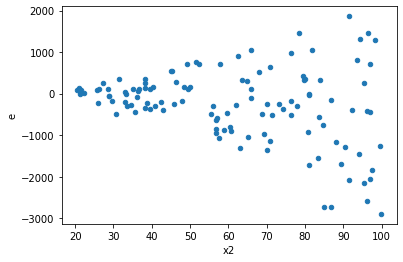

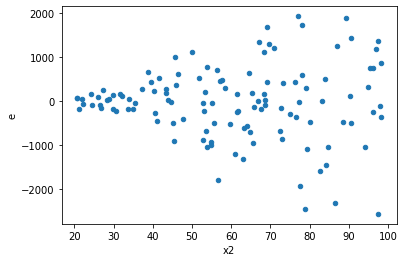

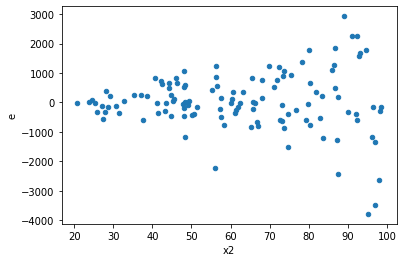

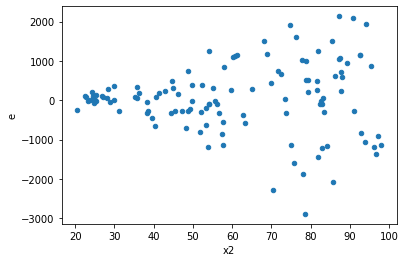

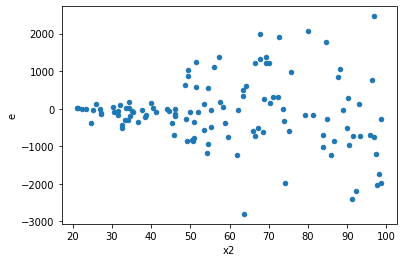

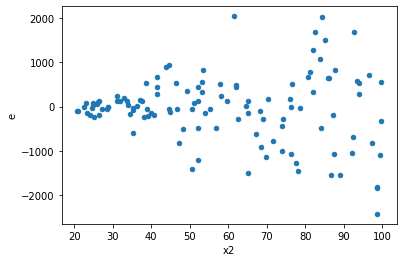

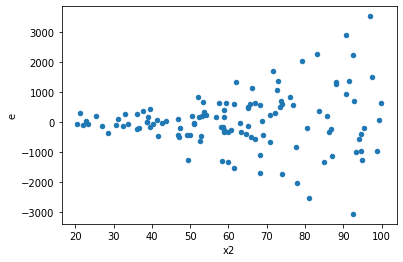

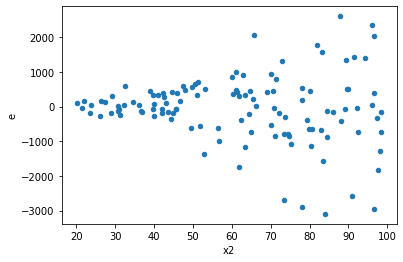

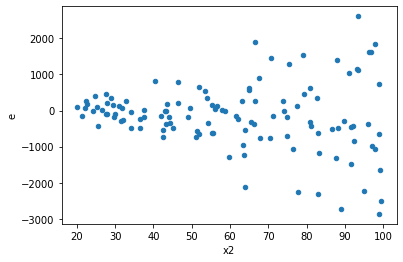

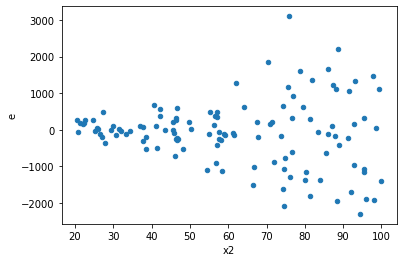

In [14]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [15]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,52.0,62.0,7019608.589351763,75804624.77221414,134992.4728721493,1222655.2382615185,9.057210466982772,6.217248937900877e-15,0.9999999999999969,3.1086244689504383e-15,Reject005=0 : Heteroscedasticity
2.0,43.0,71.0,8575479.001620801,80483724.16070147,199429.74422373957,1133573.5797281896,5.684074781023823,1.356521561746149e-10,0.9999999999321739,6.782607808730745e-11,Reject005=0 : Heteroscedasticity
3.0,53.0,61.0,5247908.666162785,97697581.61741786,99017.14464458085,1601599.6986461943,16.174973580535873,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,55.0,59.0,30926344.685752187,41329301.016286984,562297.1761045852,700496.6273946946,1.245776534478638,0.40723329665286,0.79638335167357,0.20361664832643,Reject005=1 : Homoscedasticity
6.0,52.0,62.0,18755288.452721864,88788337.0785512,360678.62409080507,1432069.9528798582,3.9704874567762514,3.7869925750833033e-07,0.9999998106503712,1.8934962875416517e-07,Reject005=0 : Heteroscedasticity
7.0,55.0,59.0,7518705.936466726,105530119.99170512,136703.744299395,1788646.1015543242,13.084104687264515,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,54.0,60.0,8019346.496464523,120536745.93859076,148506.41660119485,2008945.7656431794,13.527669791118075,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
9.0,59.0,55.0,44726640.743769094,44512075.53296659,758078.6566740525,809310.4642357562,1.0675811238196244,0.808465170833333,0.5957674145833335,0.4042325854166665,Reject005=1 : Homoscedasticity
10.0,63.0,51.0,33844196.77676498,50391278.81944572,537209.4726470632,988064.2905773671,1.8392532911021604,0.025900633453830757,0.9870496832730846,0.012950316726915378,Reject005=0 : Heteroscedasticity


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,67.0,57589004.92913186,11050377.986284254,1225297.9772155716,164931.01472066052,0.1346048208579092,4.4912676135325815e-11,Reject005=0 : Heteroscedasticity
1.0,52.0,62.0,7019608.589351763,75804624.77221414,134992.4728721493,1222655.2382615185,9.057210466982772,6.217248937900877e-15,Reject005=0 : Heteroscedasticity
2.0,43.0,71.0,8575479.001620801,80483724.16070147,199429.74422373957,1133573.5797281896,5.684074781023823,1.356521561746149e-10,Reject005=0 : Heteroscedasticity
3.0,53.0,61.0,5247908.666162785,97697581.61741786,99017.14464458085,1601599.6986461943,16.174973580535873,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,45.0,69.0,52741054.5789087,27590767.294879027,1172023.4350868599,399866.1926794062,0.34117593617039893,0.00020410132098680817,Reject005=0 : Heteroscedasticity
5.0,55.0,59.0,30926344.685752187,41329301.016286984,562297.1761045852,700496.6273946946,1.245776534478638,0.40723329665286,Reject005=1 : Homoscedasticity
6.0,52.0,62.0,18755288.452721864,88788337.0785512,360678.62409080507,1432069.9528798582,3.9704874567762514,3.7869925750833033e-07,Reject005=0 : Heteroscedasticity
7.0,55.0,59.0,7518705.936466726,105530119.99170512,136703.744299395,1788646.1015543242,13.084104687264515,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,54.0,60.0,8019346.496464523,120536745.93859076,148506.41660119485,2008945.7656431794,13.527669791118075,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    572
Reject005=1 : Homoscedasticity      428
Name: Result_test, dtype: int64